In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# change directory to the root of the project
from os import chdir

chdir("../")


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pymannkendall as mk

from sklearn.linear_model import LinearRegression


In [5]:
def get_linear_regression_adj(x, y) -> np.ndarray:
    # fit a linear regression model
    model = LinearRegression(n_jobs=-1)
    model.fit(x, y)

    # get trend
    # trend = model.coef_[0][0]

    # get prediction
    pred = model.predict(x)

    return pred


In [4]:
station_id = 330020
year = 2022


In [6]:
agg_report_data = pd.read_parquet(
    f"data/reporting/stations/{station_id}/agg_year_stats/default",
)
agg_report_data


,n_hw,mean_hw_temp,max_hw_temp,min_hw_temp,mean_hw_duration,max_hw_duration,min_hw_duration,hw_intensity,mean_hw_intensity,std_hw_intensity,max_hw_intensity,min_hw_intensity,hw_days,ratio_hw_per_day
year,,,,,,,,,,,,,,
1981,3,27.164444,29.5,24.6,3.666667,5,3,13.95,4.650000,4.521062,9.85,1.65,11.0,0.008219
1982,1,24.266667,26.8,22.8,3.000000,3,3,3.45,3.450000,NaN,3.45,3.45,3.0,0.002740
1983,2,29.291667,31.8,27.4,4.500000,6,3,14.60,7.300000,3.818377,10.00,4.60,9.0,0.005479
1984,5,26.755000,31.4,22.2,3.200000,4,3,20.10,4.020000,2.378445,7.95,1.95,16.0,0.013699
1985,1,23.066667,23.6,22.5,3.000000,3,3,5.25,5.250000,NaN,5.25,5.25,3.0,0.002740
1986,5,28.181476,34.2,21.8,4.800000,7,3,38.95,7.790000,5.783533,17.70,3.60,24.0,0.013699
1987,4,27.116667,31.4,22.2,3.250000,4,3,26.50,6.625000,4.706467,10.85,1.95,13.0,0.010959
1988,3,29.505556,32.6,27.0,3.666667,4,3,12.80,4.266667,2.648742,7.20,2.05,11.0,0.008219
1989,3,30.788889,33.4,28.2,3.000000,3,3,11.00,3.666667,3.192308,7.35,1.70,9.0,0.008219


In [7]:
def compute_stations_mk_test(save: bool = False, save_path: str = None) -> pd.DataFrame:
    """Computes the Mann-Kendall test for all stations.

    Parameters
    ----------
    save : bool, optional
        _description_, by default False
    save_path : str, optional
        _description_, by default None

    Returns
    -------
    pd.DataFrame
        _description_
    """
    print(f"Computing Mann-Kendall test for heatwave stations")
    stations_mk_test = pd.DataFrame(
        [],
        index=pd.Index([], name="station_id"),
        columns=["trend", "h", "p", "z", "Tau", "s", "var_s", "slope", "intercept"],
    )
    station_ids = [
        180005,
        200006,
        220002,
        230001,
        270001,
        # 270002,  # with data issues
        270008,
        290004,
        300046,
        310024,
        320019,
        330002,
        330007,
        330020,
        330030,
        340031,
        340045,
        360011,
        360019,
        370033,
        380013,
        390006,
        400009,
        410005,
        430002,
        430004,
        450001,
        450004,
        450005,
        460001,
        470001,
        520006,
        550001,
        950001,
        950003,
    ]

    for station_id in station_ids:
        try:
            print(f"Processing station: {station_id}")
            agg_report_data = pd.read_parquet(
                f"data/reporting/stations/{station_id}/agg_year_stats/default",
            )
            col = "hw_intensity"  # "mean_hw_temp" | "hw_intensity" | "n_hw" | "ratio_hw_per_day"
            data = agg_report_data[[col]]
            stations_mk_test.loc[station_id] = mk.original_test(data, alpha=0.05)
        except Exception:
            print(f"Could not process station: {station_id}")

    if save:
        stations_mk_test.to_parquet(save_path)

    return stations_mk_test


compute_stations_mk_test(
    save=True,
    save_path="data/reporting/stations_mk_test.parquet",
)


Computing Mann-Kendall test for heatwave stations
Processing station: 180005
Processing station: 200006
Processing station: 220002
Could not process station: 220002
Processing station: 230001
Processing station: 270001
Processing station: 270008
Processing station: 290004
Processing station: 300046
Could not process station: 300046
Processing station: 310024
Could not process station: 310024
Processing station: 320019
Could not process station: 320019
Processing station: 330002
Processing station: 330007
Processing station: 330020
Processing station: 330030
Could not process station: 330030
Processing station: 340031
Processing station: 340045
Could not process station: 340045
Processing station: 360011
Processing station: 360019
Could not process station: 360019
Processing station: 370033
Could not process station: 370033
Processing station: 380013
Processing station: 390006
Processing station: 400009
Processing station: 410005
Could not process station: 410005
Processing station: 430

,trend,h,p,z,Tau,s,var_s,slope,intercept
station_id,,,,,,,,,
180005,no trend,False,0.455535,-0.746219,-0.126316,-24.0,950.000000,-0.277232,12.733705
200006,no trend,False,0.915867,-0.105642,-0.019763,-5.0,1433.666667,-0.053846,15.142308
230001,no trend,False,0.293302,-1.050906,-0.126050,-75.0,4958.333333,-0.170000,9.790000
270001,no trend,False,0.102956,1.630689,0.197861,111.0,4550.333333,0.131579,2.378947
270008,increasing,True,0.009627,2.588932,0.438596,75.0,817.000000,4.640000,-3.560000
290004,no trend,False,0.595270,0.531215,0.063492,40.0,5390.000000,0.152083,11.188542
330002,increasing,True,0.000732,3.377199,0.464387,163.0,2301.000000,3.057143,-4.042857
330007,increasing,True,0.032995,2.132139,0.235897,184.0,7366.666667,0.494782,9.051755
330020,increasing,True,0.000026,4.206023,0.464103,362.0,7366.666667,1.567920,-13.174432


In [9]:
col_name_map = {
    "n_hw": "Number of Heatwaves",
    "mean_hw_temp": "Mean Heatwave Temperature",
    "max_hw_temp": "Max Heatwave Temperature",
    "min_hw_temp": "Min Heatwave Temperature",
    "mean_hw_duration": "Mean Heatwave Duration",
    "max_hw_duration": "Max Heatwave Duration",
    "min_hw_duration": "Min Heatwave Duration",
    "hw_intensity": "Heatwave Intensity",
    "mean_hw_intensity": "Mean Heatwave Intensity",
    "std_hw_intensity": "Std Heatwave Intensity",
    "max_hw_intensity": "Max Heatwave Intensity",
    "min_hw_intensity": "Min Heatwave Intensity",
    "hw_days": "Heatwave Days",
    "ratio_hw_per_day": "Ratio Heatwaves per Day",
}


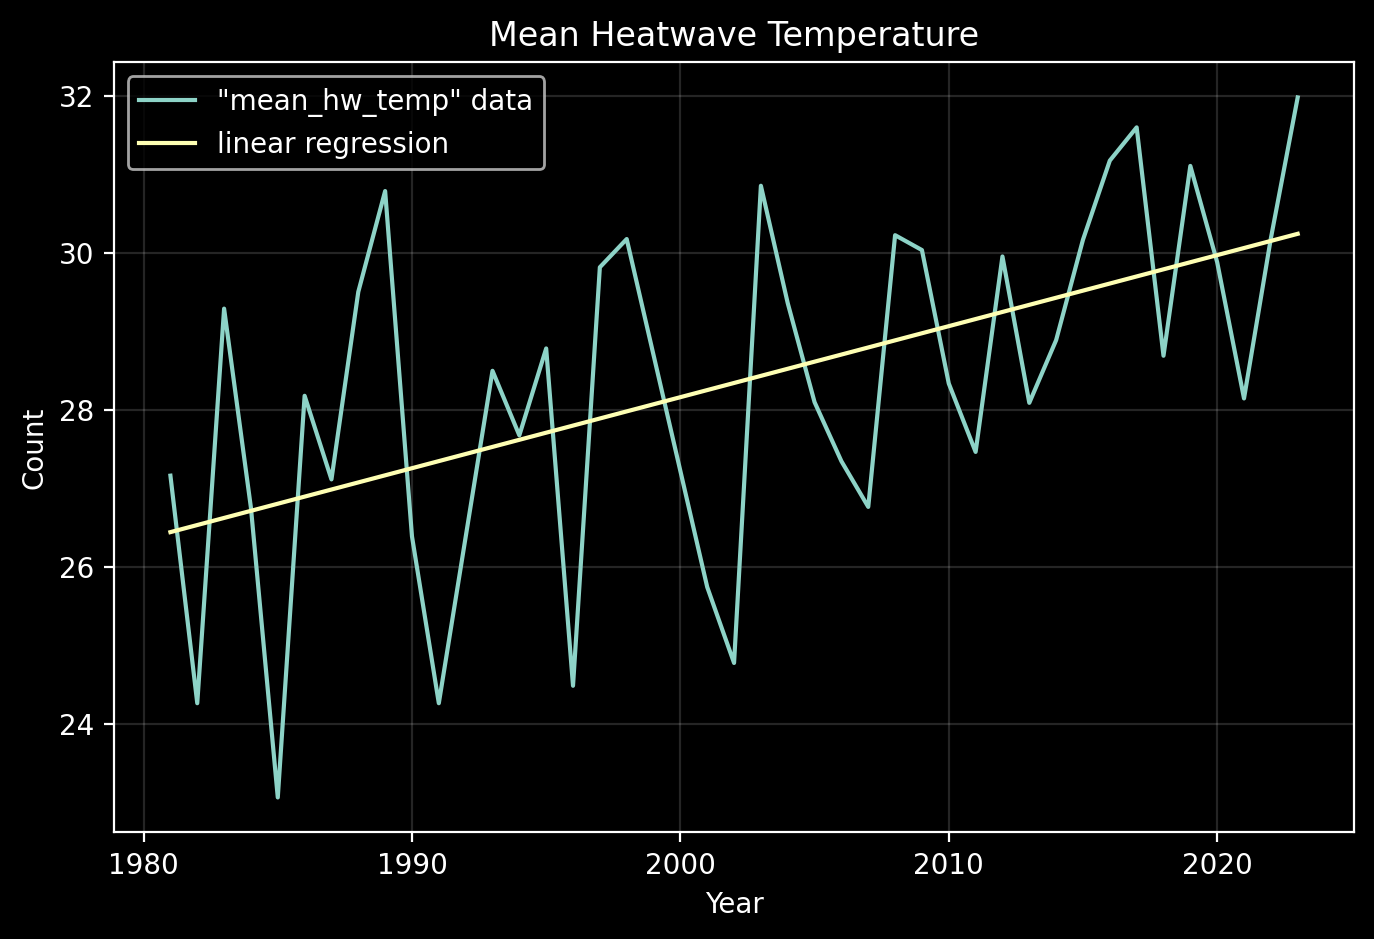

mk_test,value
output,
trend,increasing
h,True
p,0.000473
z,3.495548
Tau,0.385897
s,301.0
var_s,7365.666667
slope,0.098344
intercept,26.678126


In [13]:
# simple linear fit to justify up-trend
# cols = ["mean_hw_temp", "hw_intensity", "n_hw", "ratio_hw_per_day"]
col = "mean_hw_temp"
data = agg_report_data[[col]]

# get prediction
pred = get_linear_regression_adj(
    data.index.values.reshape(-1, 1),
    data[col].values.reshape(-1, 1),
)

# plot
plt.plot(data.index, data[col], label=f'"{col}" data')
plt.plot(data.index, pred, label="linear regression")
plt.legend()

plt.xlabel("Year")
plt.ylabel("Count")
plt.title(col_name_map[col])
plt.grid(
    visible=True,
    alpha=0.15,
)
plt.show()
